## Análisis de datos - Clase 6

#### Técnicas de extracción de features
### Análisis de componentes principales (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [2]:
# Datos sin transformar
X = np.array([
    [2, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [3, 2, 1]
], dtype=float)

print("Datos:\n", X)

Datos:
 [[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [3. 2. 1.]]


### 1. Cálculo *artesanal* (con numpy)

In [3]:
# Como las variables están en la misma escala y las unidades son comparables, alcanza con centrar en la media.
# No hace falta estandarizar

mean_vec = np.mean(X, axis=0)
Xc = X - mean_vec
Xc

array([[ 0.75, -0.75, -0.5 ],
       [-1.25,  0.25, -0.5 ],
       [-1.25, -0.75,  0.5 ],
       [ 1.75,  1.25,  0.5 ]])

In [4]:
# Construimos la matriz de covarianza
cov_matrix = np.cov(Xc, rowvar=False)
cov_matrix

array([[2.25      , 0.75      , 0.16666667],
       [0.75      , 0.91666667, 0.16666667],
       [0.16666667, 0.16666667, 0.33333333]])

In [5]:
# Calculamos los autovalores y autovectores
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Ordenamos los autovectores de mayor a menor (según los autovalores)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Autovalores:", eigvals)
print("\nAutovectores (columnas):\n", eigvecs)

Autovalores: [2.60816947 0.60366691 0.28816361]

Autovectores (columnas):
 [[-0.90633825 -0.42156318  0.02890425]
 [-0.4113763   0.86467006 -0.28829713]
 [-0.09654282  0.27318524  0.95710465]]


In [6]:
# Varianza explicada
explained_variance_ratio = eigvals / np.sum(eigvals)
print("Varianza explicada (%):", explained_variance_ratio * 100)

Varianza explicada (%): [74.51912773 17.24762613  8.23324614]


In [7]:
# Proyección al nuevo espacio de dimensiones (PC1 y PC2)
W = eigvecs[:, :2]   # nos quedamos con los 2 primeros autovectores
Y = Xc @ W
Y

array([[-0.32295006, -1.10126755],
       [ 1.07835015,  0.60652887],
       [ 1.39318363,  0.01504406],
       [-2.14858372,  0.47969462]])

### 2. Cálculo con Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [8]:
# Datos sin transformar
X = np.array([
    [2, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [3, 2, 1]
], dtype=float)

In [9]:
pca = PCA(n_components=2) # PCA con 2 componentes principales
pca.fit(X)                # calcula los autovalores y autovectores (por defecto, centra los datos, pero no los escala!)

print("\nVarianza de cada componente:", pca.explained_variance_)        # Autovalores
print("\nVarianza explicada (%):", pca.explained_variance_ratio_ * 100) # varianza explicada
print("\nComponentes principales:\n", pca.components_)                  # Autovectores


Varianza de cada componente: [2.60816947 0.60366691]

Varianza explicada (%): [74.51912773 17.24762613]

Componentes principales:
 [[ 0.90633825  0.4113763   0.09654282]
 [-0.42156318  0.86467006  0.27318524]]


In [10]:
Y = pca.transform(X)  # Proyecta los datos
Y

array([[ 0.32295006, -1.10126755],
       [-1.07835015,  0.60652887],
       [-1.39318363,  0.01504406],
       [ 2.14858372,  0.47969462]])

### 3. Ejemplo con dataset Iris

In [11]:
# Dataset Iris
iris = load_iris()
print(iris.data[:10, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [12]:
X = iris.data
y = iris.target
target_names = iris.target_names

np.shape(iris.data)

(150, 4)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño train:", X_train.shape, "Test:", X_test.shape)

Tamaño train: (120, 4) Test: (30, 4)


In [15]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

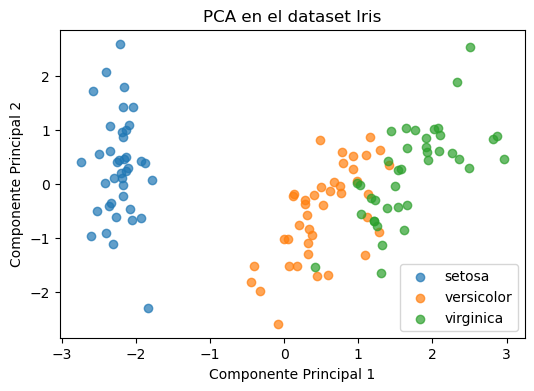

In [16]:
# Hago el análisis de los componentes principales (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(6, 4))
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.title("PCA en el dataset Iris")
plt.show()

In [17]:
print(pca.explained_variance_ratio_)  # % de varianza capturada por cada componente

[0.72551423 0.23000922]


In [18]:
df_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y_train
df_pca

,PCA1,PCA2,target
0,-2.741058,0.415798,0
1,-2.214577,2.604762,0
2,0.926828,0.529167,1
3,-2.293429,0.108078,0
4,-2.524548,-0.496938,0
...,...,...,...
115,0.521362,-0.385743,1
116,0.415127,-1.535405,2
117,-2.159999,1.811532,0
118,0.377947,-0.947346,1


In [19]:
# Luego de entrenado el modelo, aplicamos PCA en el dataset de test para poder evaluarlo:
X_test_pca = pca.transform(X_test_scaled)

df_test_pca = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])
df_test_pca

,PCA1,PCA2
0,0.679466,-0.385006
1,-1.859485,1.367548
2,3.374187,0.082834
3,0.715433,-0.205865
4,1.305286,-0.034010
5,-1.797417,0.408900
6,0.011888,-0.423833
7,1.965792,0.705358
8,1.266044,-1.547501
9,0.283942,-0.743312
